## **IT3212 - Assignment 1 - Group 25**

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['axes.xmargin'] = 0
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import display, HTML
from sklearn.decomposition import PCA

RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [188]:
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False) 

- [Task 1 - Data Exploration](#task_1)
- [Task 2 - Data Cleaning](#task_2)
- [Task 3 - Handling Outliers](#task_3)
- [Task 4 - Data Transformation](#task_4)
- [Task 5 - Data Splitting](#task_5)
- [Task 6 - Bonus Task](#task_6)

 ___
 <a id='task_1'></a>
### **TASK 1 - Data Exploration (10p)**
___

**(a) Explore the dataset by**
- ✅ displaying the first few rows
- ✅ summary statistics
- ✅ data types of each column

**(b) Identify**
- ✅ missing values and outliers
- ✅ unique values in categorical columns

### **Load datasets**

In [189]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_oil = pd.read_csv('../data/oil.csv')
df_holidays_events = pd.read_csv('../data/holidays_events.csv')
df_stores = pd.read_csv('../data/stores.csv')
df_transactions = pd.read_csv('../data/transactions.csv')

In [190]:
df_stores = df_stores.rename(columns={'type': 'type_stores'})
df_holidays_events = df_holidays_events.rename(columns={'type': 'type_holidays_events'})

In [191]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

dataframes = {
    'Training dataset': df_train,
    'Oil price dataset' :df_oil,
    'Holidays and events dataset': df_holidays_events,
    'Stores dataset': df_stores,
    'Transactions dataset': df_transactions
}

### **Display the first 5 rows**

In [192]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.head())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.140
2,2013-01-03,92.970
3,2013-01-04,93.120
4,2013-01-07,93.200


,date,type_holidays_events,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,store_nbr,city,state,type_stores,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### **Display the summary statistics for numerical columns**

In [193]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.describe())

,id,date,store_nbr,sales,onpromotion
count,3000888.000,3000888,3000888.000,3000888.000,3000888.000
mean,1500443.500,2015-04-24 08:27:04.703088384,27.500,357.776,2.603
min,0.000,2013-01-01 00:00:00,1.000,0.000,0.000
25%,750221.750,2014-02-26 18:00:00,14.000,0.000,0.000
50%,1500443.500,2015-04-24 12:00:00,27.500,11.000,0.000
75%,2250665.250,2016-06-19 06:00:00,41.000,195.847,0.000
max,3000887.000,2017-08-15 00:00:00,54.000,124717.000,741.000
std,866281.892,NaN,15.586,1101.998,12.219


,date,dcoilwtico
count,1218,1175.000
mean,2015-05-02 12:00:00,67.714
min,2013-01-01 00:00:00,26.190
25%,2014-03-03 06:00:00,46.405
50%,2015-05-02 12:00:00,53.190
75%,2016-06-30 18:00:00,95.660
max,2017-08-31 00:00:00,110.620
std,NaN,25.630


,date
count,350
mean,2015-04-24 00:45:15.428571392
min,2012-03-02 00:00:00
25%,2013-12-23 06:00:00
50%,2015-06-08 00:00:00
75%,2016-07-03 00:00:00
max,2017-12-26 00:00:00


,store_nbr,cluster
count,54.000,54.000
mean,27.500,8.481
std,15.732,4.693
min,1.000,1.000
25%,14.250,4.000
50%,27.500,8.500
75%,40.750,13.000
max,54.000,17.000


,date,store_nbr,transactions
count,83488,83488.000,83488.000
mean,2015-05-20 16:07:40.866232064,26.939,1694.602
min,2013-01-01 00:00:00,1.000,5.000
25%,2014-03-27 00:00:00,13.000,1046.000
50%,2015-06-08 00:00:00,27.000,1393.000
75%,2016-07-14 06:00:00,40.000,2079.000
max,2017-08-15 00:00:00,54.000,8359.000
std,NaN,15.608,963.287


### **Display the data type of each column**

In [194]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           3000888 non-null  int64         
 1   date         3000888 non-null  datetime64[ns]
 2   store_nbr    3000888 non-null  int64         
 3   family       3000888 non-null  object        
 4   sales        3000888 non-null  float64       
 5   onpromotion  3000888 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  350 non-null    datetime64[ns]
 1   type_holidays_events  350 non-null    object        
 2   locale                350 non-null    object        
 3   locale_name           350 non-null    object        
 4   description           350 non-null    object        
 5   transferred           350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_nbr    54 non-null     int64 
 1   city         54 non-null     object
 2   state        54 non-null     object
 3   type_stores  54 non-null     object
 4   cluster      54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


None

### **Check for missing values**

In [195]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    display(df.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

date           0
dcoilwtico    43
dtype: int64

date                    0
type_holidays_events    0
locale                  0
locale_name             0
description             0
transferred             0
dtype: int64

store_nbr      0
city           0
state          0
type_stores    0
cluster        0
dtype: int64

date            0
store_nbr       0
transactions    0
dtype: int64

### **Check for outliers (time-series inspection)**

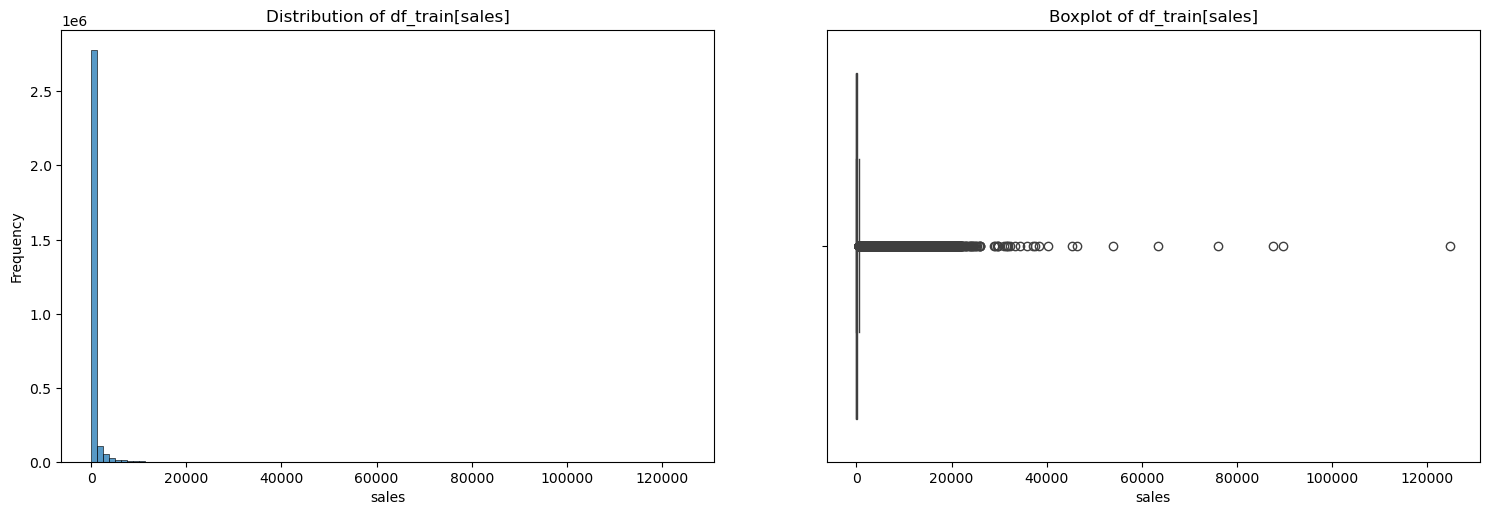

In [196]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_train['sales'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_train[sales]')
axes[0].set_xlabel('sales')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_train['sales'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_train[sales]')
axes[1].set_xlabel('sales')
plt.show()

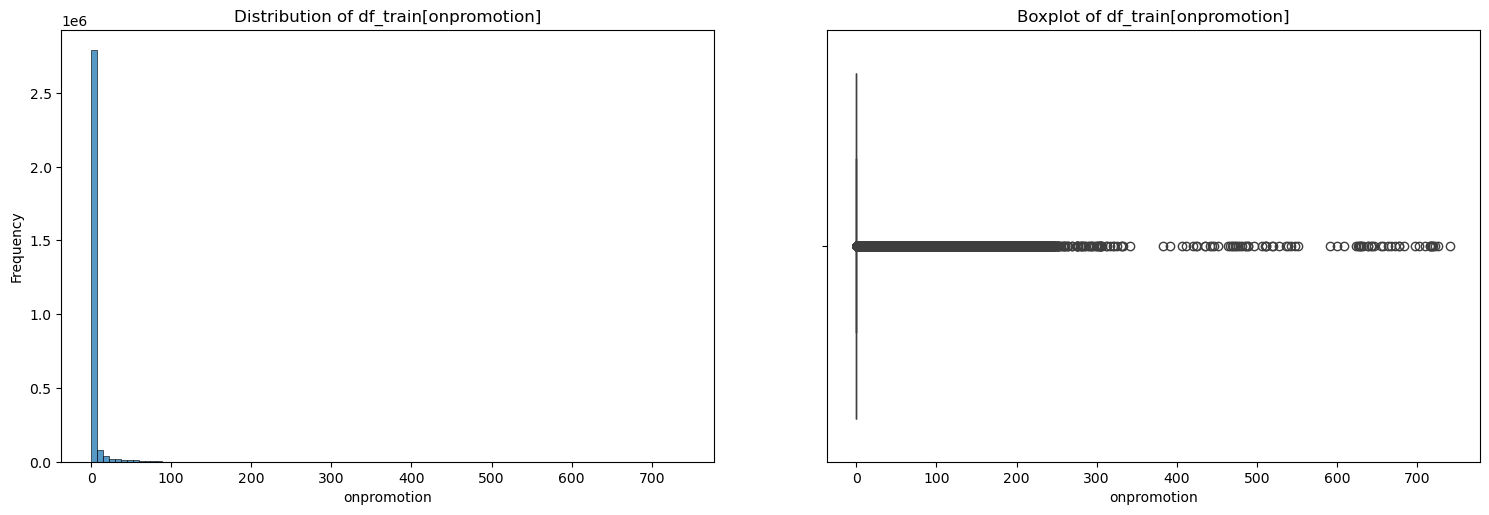

In [197]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_train['onpromotion'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_train[onpromotion]')
axes[0].set_xlabel('onpromotion')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_train['onpromotion'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_train[onpromotion]')
axes[1].set_xlabel('onpromotion')
plt.show()

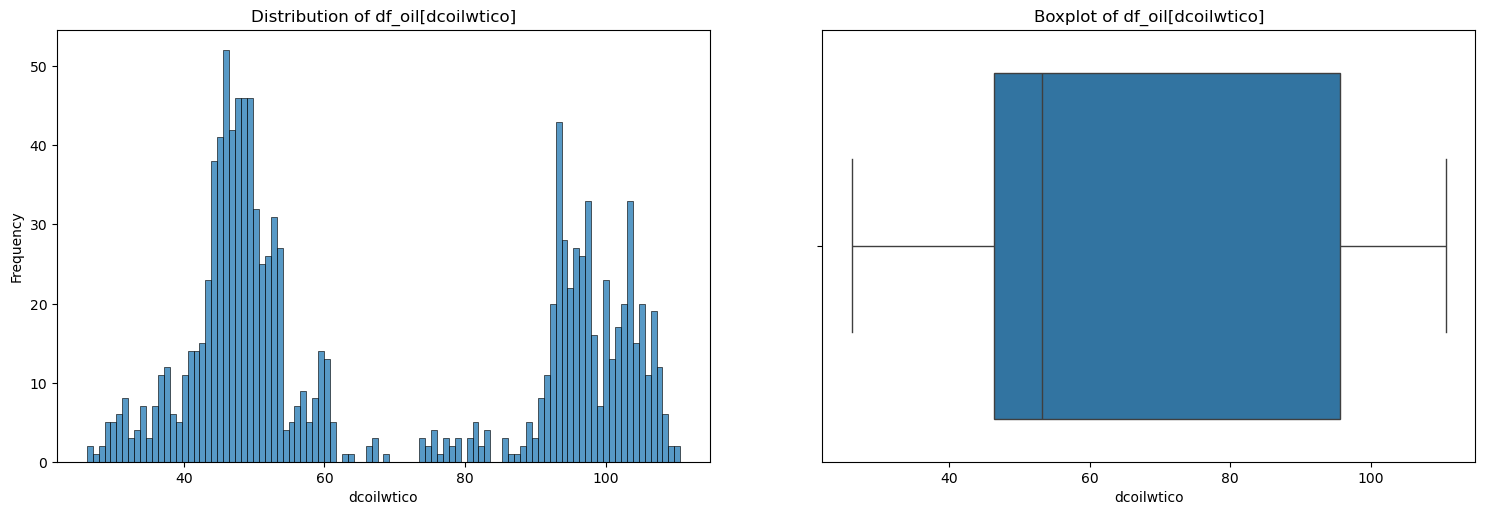

In [198]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_oil['dcoilwtico'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of df_oil[dcoilwtico]')
axes[0].set_xlabel('dcoilwtico')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_oil['dcoilwtico'], ax=axes[1])
axes[1].set_title(f'Boxplot of df_oil[dcoilwtico]')
axes[1].set_xlabel('dcoilwtico')
plt.show()

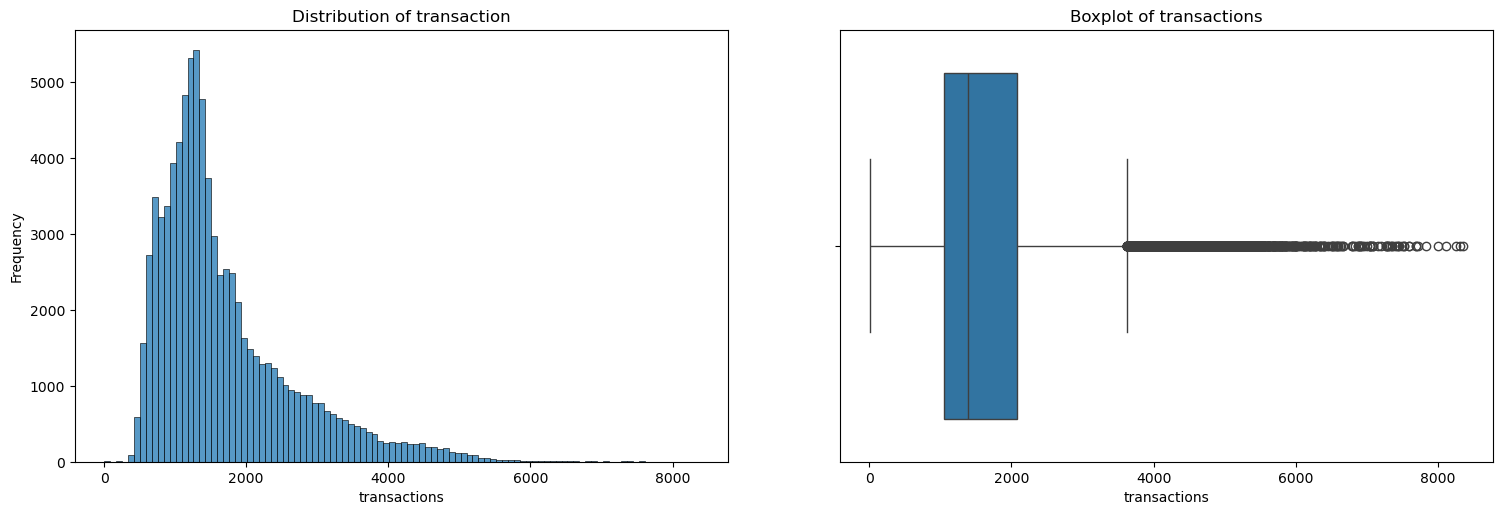

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.tight_layout(pad=5.0)
    
sns.histplot(df_transactions['transactions'], bins=100, ax=axes[0])
axes[0].set_title(f'Distribution of transaction')
axes[0].set_xlabel('transactions')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df_transactions['transactions'], ax=axes[1])
axes[1].set_title(f'Boxplot of transactions')
axes[1].set_xlabel('transactions')
plt.show()

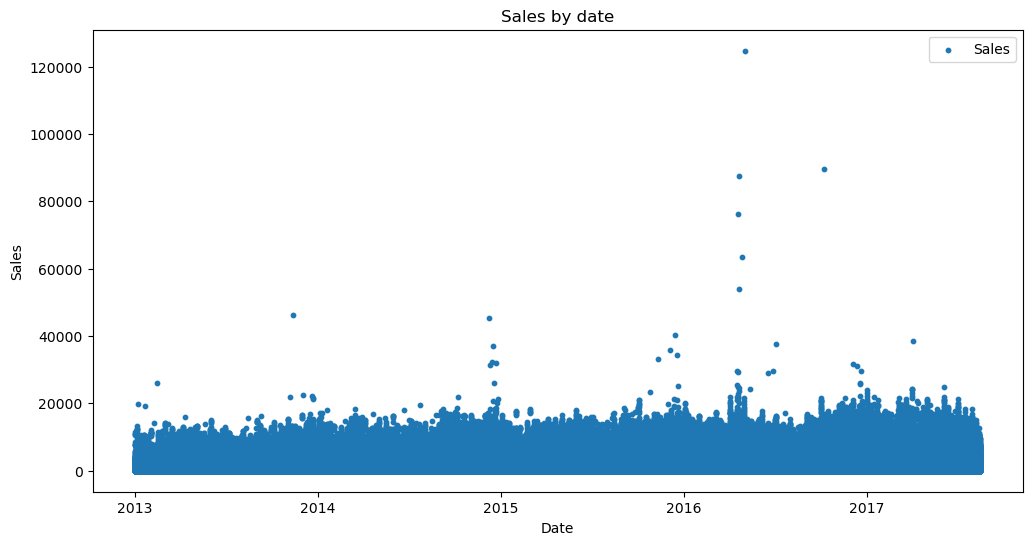

In [200]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_train['date'], y=df_train['sales'], label='Sales', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by date')
plt.legend()
plt.show()

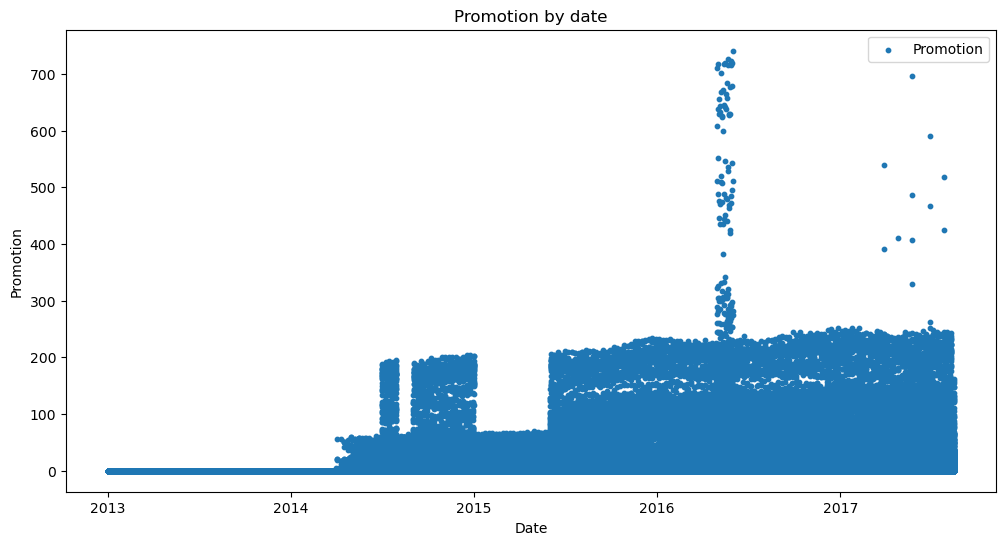

In [201]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_train['date'], y=df_train['onpromotion'], label='Promotion', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Promotion')
plt.title('Promotion by date')
plt.legend()
plt.show()

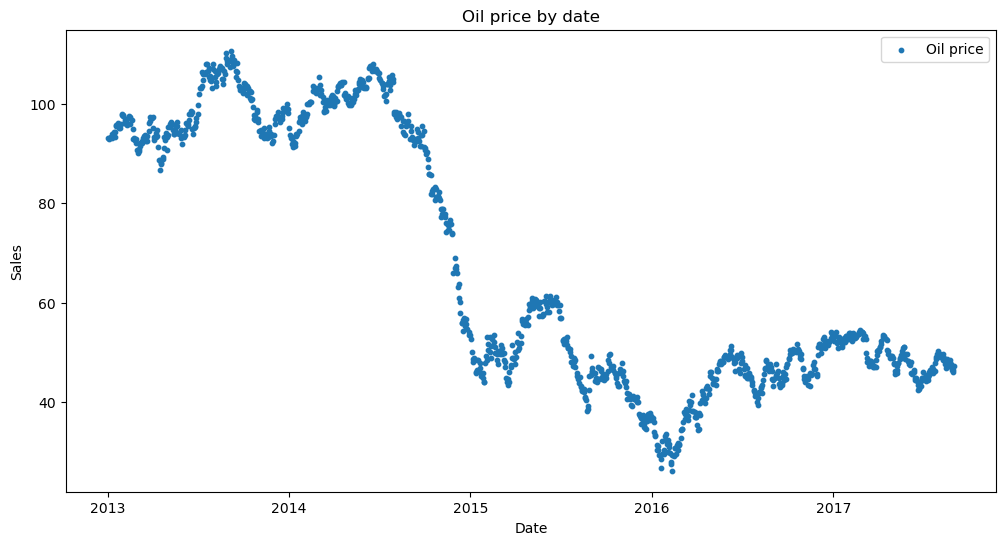

In [202]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_oil['date'], y=df_oil['dcoilwtico'], label='Oil price', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Oil price by date')
plt.legend()
plt.show()

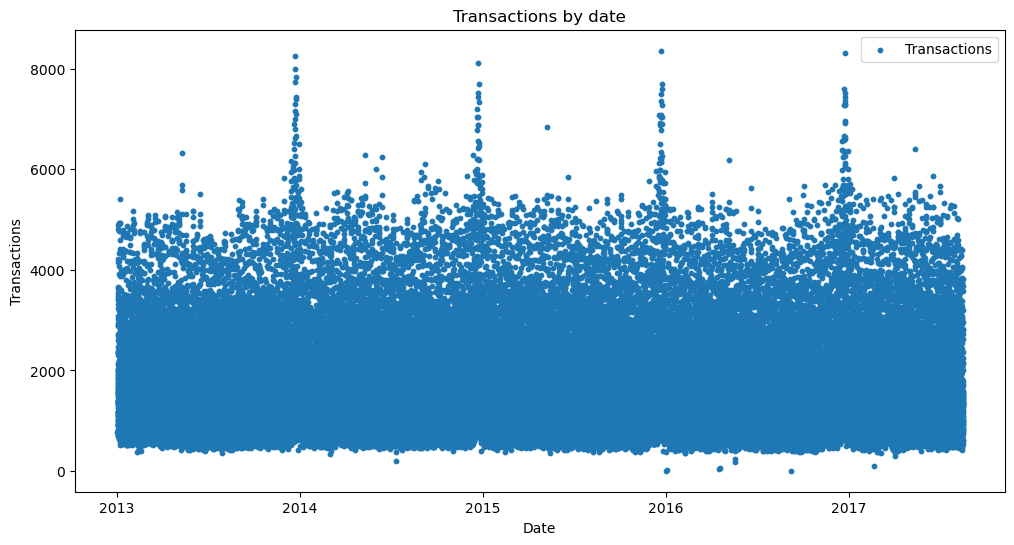

In [203]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df_transactions['date'], y=df_transactions['transactions'], label='Transactions', marker='o', s=10)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Transactions by date')
plt.legend()
plt.show()

### **Check for unique values in categorical columns**

In [204]:
for name, df in dataframes.items():
    display(HTML(f"<h3 style='color: black;'>{name}</h3>"))
    columns_to_display = list(df.select_dtypes(include=["object"]).columns) 
    if 'store_nbr' in df:
        columns_to_display.append('store_nbr')
    columns_to_display = [column for column in columns_to_display if column != 'date']
    display(
        HTML(
            pd.DataFrame(
                [
                    {
                        "Column Name": column,
                        "Unique Values": ", ".join(map(str, df[column].unique())),
                    }
                    for column in columns_to_display
                ]
            ).to_html(index=False)
        )
    )

Column Name,Unique Values
family,"AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOOKS, BREAD/BAKERY, CELEBRATION, CLEANING, DAIRY, DELI, EGGS, FROZEN FOODS, GROCERY I, GROCERY II, HARDWARE, HOME AND KITCHEN I, HOME AND KITCHEN II, HOME APPLIANCES, HOME CARE, LADIESWEAR, LAWN AND GARDEN, LINGERIE, LIQUOR,WINE,BEER, MAGAZINES, MEATS, PERSONAL CARE, PET SUPPLIES, PLAYERS AND ELECTRONICS, POULTRY, PREPARED FOODS, PRODUCE, SCHOOL AND OFFICE SUPPLIES, SEAFOOD"
store_nbr,"1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 6, 7, 8, 9"


Column Name,Unique Values
type_holidays_events,"Holiday, Transfer, Additional, Bridge, Work Day, Event"
locale,"Local, Regional, National"
locale_name,"Manta, Cotopaxi, Cuenca, Libertad, Riobamba, Puyo, Guaranda, Imbabura, Latacunga, Machala, Santo Domingo, El Carmen, Cayambe, Esmeraldas, Ecuador, Ambato, Ibarra, Quevedo, Santo Domingo de los Tsachilas, Santa Elena, Quito, Loja, Salinas, Guayaquil"
description,"Fundacion de Manta, Provincializacion de Cotopaxi, Fundacion de Cuenca, Cantonizacion de Libertad, Cantonizacion de Riobamba, Cantonizacion del Puyo, Cantonizacion de Guaranda, Provincializacion de Imbabura, Cantonizacion de Latacunga, Fundacion de Machala, Fundacion de Santo Domingo, Cantonizacion de El Carmen, Cantonizacion de Cayambe, Fundacion de Esmeraldas, Primer Grito de Independencia, Fundacion de Riobamba, Fundacion de Ambato, Fundacion de Ibarra, Cantonizacion de Quevedo, Independencia de Guayaquil, Traslado Independencia de Guayaquil, Dia de Difuntos, Independencia de Cuenca, Provincializacion de Santo Domingo, Provincializacion Santa Elena, Independencia de Guaranda, Independencia de Latacunga, Independencia de Ambato, Fundacion de Quito-1, Fundacion de Quito, Fundacion de Loja, Navidad-4, Cantonizacion de Salinas, Navidad-3, Navidad-2, Puente Navidad, Navidad-1, Navidad, Navidad+1, Puente Primer dia del ano, Primer dia del ano-1, Primer dia del ano, Recupero puente Navidad, Recupero puente primer dia del ano, Carnaval, Viernes Santo, Dia del Trabajo, Dia de la Madre-1, Dia de la Madre, Batalla de Pichincha, Fundacion de Guayaquil-1, Fundacion de Guayaquil, Inauguracion Mundial de futbol Brasil, Mundial de futbol Brasil: Ecuador-Suiza, Mundial de futbol Brasil: Ecuador-Honduras, Mundial de futbol Brasil: Ecuador-Francia, Mundial de futbol Brasil: Octavos de Final, Mundial de futbol Brasil: Cuartos de Final, Mundial de futbol Brasil: Semifinales, Mundial de futbol Brasil: Tercer y cuarto lugar, Mundial de futbol Brasil: Final, Black Friday, Cyber Monday, Recupero Puente Navidad, Recupero Puente Primer dia del ano, Terremoto Manabi, Terremoto Manabi+1, Terremoto Manabi+2, Terremoto Manabi+3, Terremoto Manabi+4, Terremoto Manabi+5, Terremoto Manabi+6, Terremoto Manabi+7, Terremoto Manabi+8, Terremoto Manabi+9, Terremoto Manabi+10, Terremoto Manabi+11, Terremoto Manabi+12, Terremoto Manabi+13, Terremoto Manabi+14, Terremoto Manabi+15, Terremoto Manabi+16, Terremoto Manabi+17, Terremoto Manabi+18, Terremoto Manabi+19, Terremoto Manabi+20, Terremoto Manabi+21, Terremoto Manabi+22, Terremoto Manabi+23, Terremoto Manabi+24, Terremoto Manabi+25, Terremoto Manabi+26, Terremoto Manabi+27, Terremoto Manabi+28, Terremoto Manabi+29, Terremoto Manabi+30, Traslado Batalla de Pichincha, Traslado Fundacion de Guayaquil, Traslado Primer Grito de Independencia, Puente Dia de Difuntos, Recupero Puente Dia de Difuntos, Traslado Primer dia del ano, Traslado Fundacion de Quito"


Column Name,Unique Values
city,"Quito, Santo Domingo, Cayambe, Latacunga, Riobamba, Ibarra, Guaranda, Puyo, Ambato, Guayaquil, Salinas, Daule, Babahoyo, Quevedo, Playas, Libertad, Cuenca, Loja, Machala, Esmeraldas, Manta, El Carmen"
state,"Pichincha, Santo Domingo de los Tsachilas, Cotopaxi, Chimborazo, Imbabura, Bolivar, Pastaza, Tungurahua, Guayas, Santa Elena, Los Rios, Azuay, Loja, El Oro, Esmeraldas, Manabi"
type_stores,"D, B, C, E, A"
store_nbr,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54"


Column Name,Unique Values
store_nbr,"25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21, 42, 22, 52"


___
<a id='task_2'></a>
### **TASK 2 - Data Cleaning (20p)**
___
**(a) Handling Missing Values** ✅ 

**(b) Choose appropriate methods to handle missing values** ✅ 

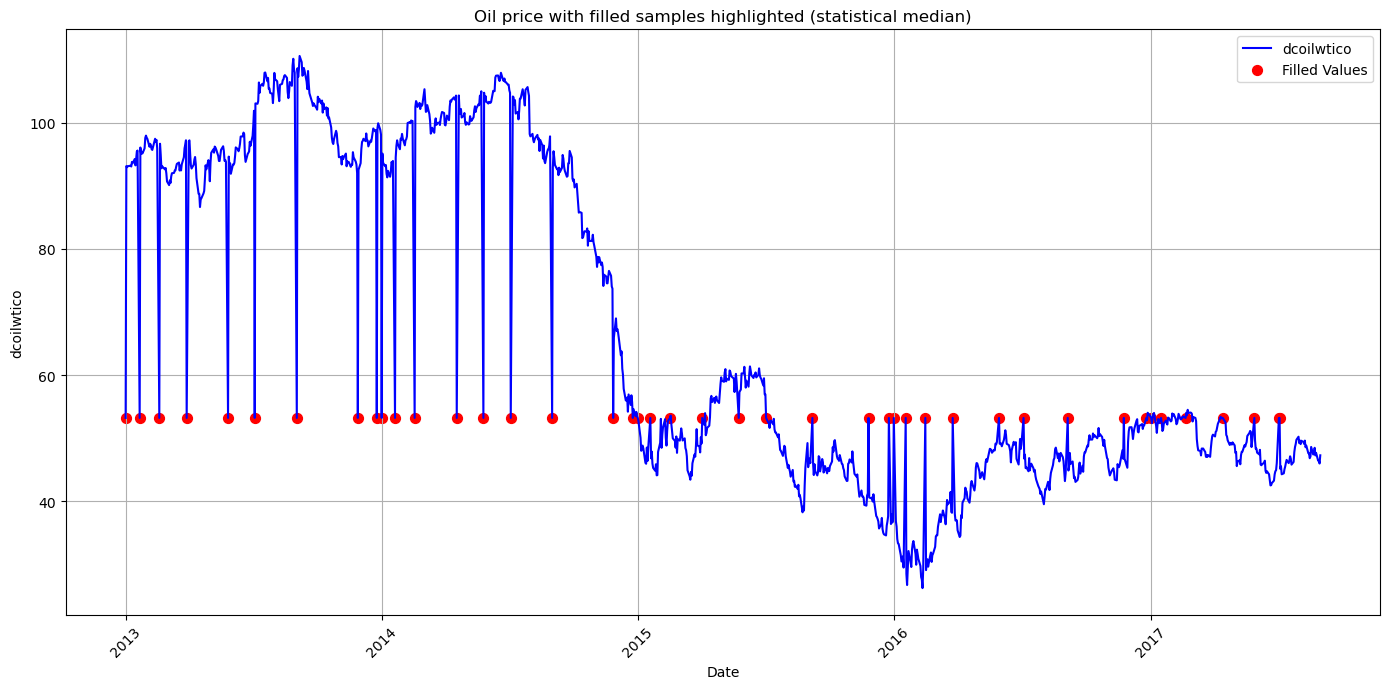

In [205]:
df_oil_copy = df_oil.copy()
median_value = df_oil_copy['dcoilwtico'].median()
original_dcoilwtico = df_oil_copy['dcoilwtico'].copy()
df_oil_copy['dcoilwtico'] = df_oil_copy['dcoilwtico'].fillna(median_value)
filled_mask = original_dcoilwtico.isnull()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_oil_copy, x='date', y='dcoilwtico', color='blue', label='dcoilwtico', marker='', linestyle='-')
plt.scatter(df_oil_copy.loc[filled_mask, 'date'], 
    df_oil_copy.loc[filled_mask, 'dcoilwtico'], 
    color='red', label='Filled Values', s=50
)
plt.title('Oil price with filled samples highlighted (statistical median)')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


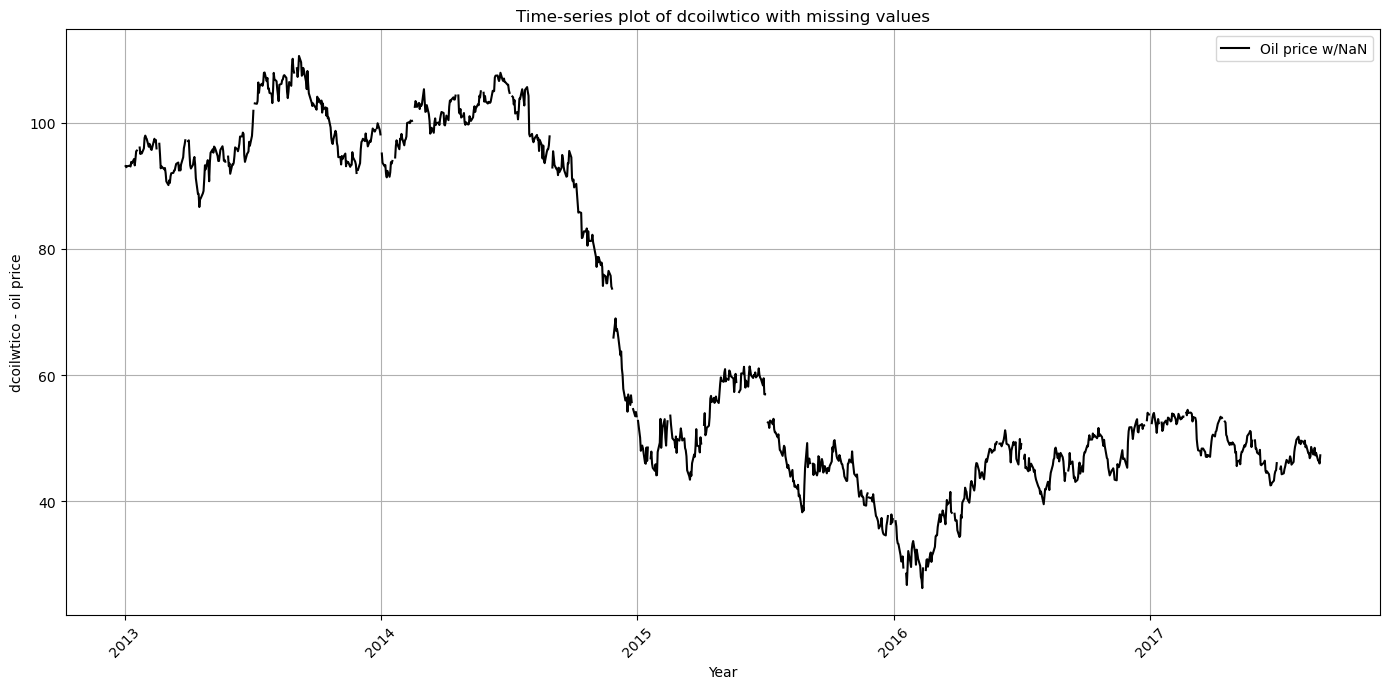

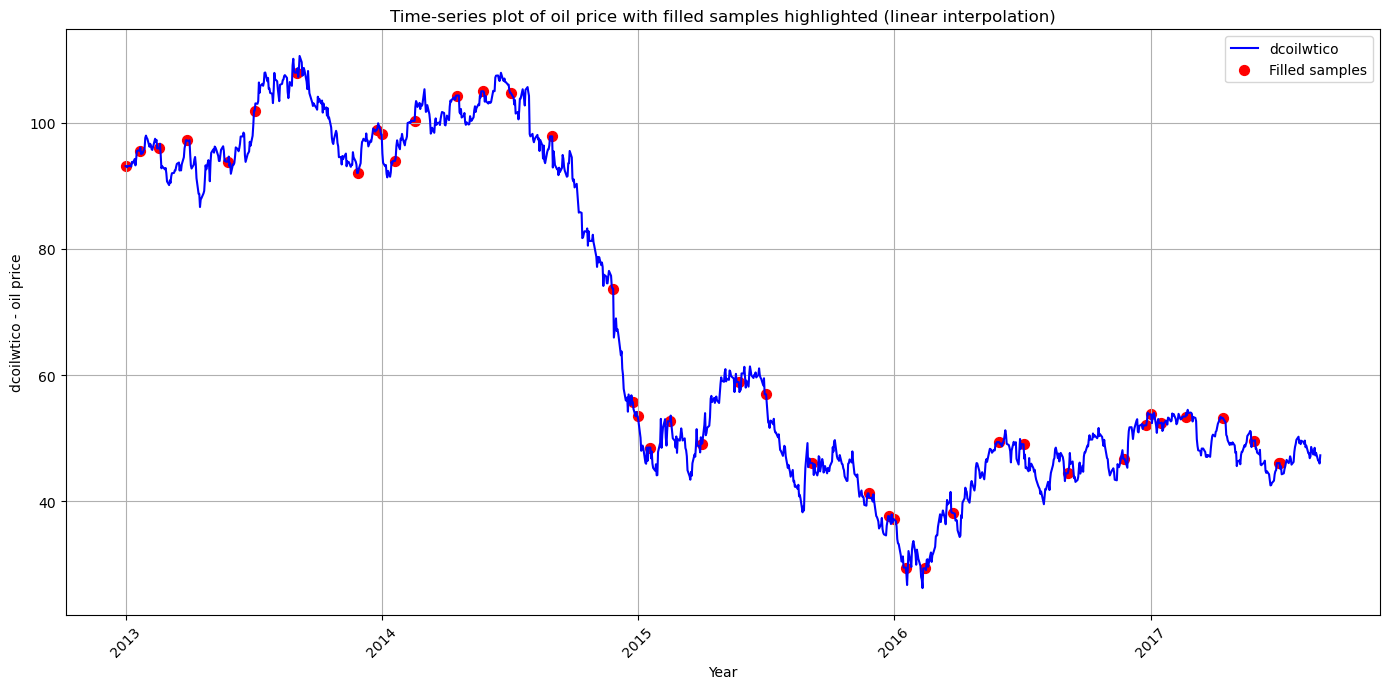

In [206]:
plt.figure(figsize=(14, 7))
plt.plot(df_oil['date'], df_oil['dcoilwtico'], color='black', label='Oil price w/NaN')
plt.title('Time-series plot of dcoilwtico with missing values')
plt.xlabel('Year')
plt.ylabel('dcoilwtico - oil price')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

df_oil_copy = df_oil.copy()
original_dcoilwtico = df_oil_copy['dcoilwtico'].copy()
df_oil_copy['dcoilwtico'] = df_oil_copy['dcoilwtico'].ffill().interpolate().bfill()
filled_mask = original_dcoilwtico.isnull()
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_oil_copy, x='date', y='dcoilwtico', color='blue', label='dcoilwtico', marker='', linestyle='-')
plt.scatter(df_oil_copy.loc[filled_mask, 'date'], 
            df_oil_copy.loc[filled_mask, 'dcoilwtico'], 
            color='red', label='Filled samples', s=50)
plt.title('Time-series plot of oil price with filled samples highlighted (linear interpolation)')
plt.xlabel('Year')
plt.ylabel('dcoilwtico - oil price')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

df_oil = df_oil_copy.copy()

In [207]:
print(df_oil.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


**(c) Justify your choices for handling missing data** ✅ 
<br>
Initial data exploration revealed that only table oil['dcoilwtico_old'] is missing values. Dropping all rows containing one or several columns of missing values is a simple solution, but should be avoided if possible as you risk loosing too much valuable information. Secondly it introduces issues when trying feature engineering this table with others (mismatching rows). Of course if a column is missing major part of its data, one might consider discarding/deleting the column altogether.

By visual inspection there are no substantial sections missing, and those intervals of missing values seem to be of constant rate of change. If possible imputing missing values with statistical approximation methods is prefered. 

Statistical mean or median provide good estimates of missing values if the data is normally distributed, but dealing with oil prices these often vary quite stochasticly and the distribution was not normal. In this case interpolation was giving the best approximation of missing data. Note that interpolation is not able filling missing data point at starting/end of the data set. 

Forward fill and backward fill are methods considered particularly useful for time-series data. We used interpolation as the primary method, supplemented with backfill making sure the missing value in first row was handled correctly.

 <a id='task_3'></a>
___
### **TASK 3 - Handling Outliers (20p)**
___

 <a id='task_4'></a>
___
### **TASK 4 - Data Transformation (30p)**
___

 <a id='task_5'></a>
___
### **TASK 5 - Data Splitting (10p)**
___
**(a) Split the preprocessed dataset into training and testing sets** ✅
<br>
Note this dataset was explicitly provided with pre-defined training and test data, thus splitting is not strictly required. In the general case one is provided with a singular data volume, that must be divided into training and test sets. It is customary further splitting the training data into training and validation data, both used during the training process. Training data is provided to the learning algorithm to train the model (tuning of model parameters), while the validation data is important for optimizing the hyperparameters.

In [208]:
target_variable = 'sales'

X = df_train.drop(target_variable, axis=1)
y = df_train[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

**(b) Explain the importance of splitting the data and how it prevents overfitting** ✅
<br>
When constructing and training a model one must carefully balance model complexity/capacity against available training data. In many cases the model may achieve 100% performance metric evaluated on its training data. Perfect score is undesirable as this indicates the model has overfitted on training data, and is likely not to generalize well later on new unseen data. Overfitting and underfitting both lead to sub-optimal models and the trick is to train a model enough that it understands the most important characteristics of the training data, without learning all nitricate data details (such as noise or outliers). 

Test data is essential when conducting final evaluation of model performance after training is completed. Test data is a smaller batch of the original data set, that is kept aside/hidden from the model during training. When we evaluate the final model with this test data it should reveal how successfull the training was, and what level of performance one should expect from the model on the average case. Naturally the model performs shows better performance on training data compared to test data, however too large deviation might suggest overfitting.

One assumption is that training and test data are of same origin and therefore similar properties, this must be checked during data exploratory analsys. If they are too dissimilar this must be taken care of during data pre-processing. Often when splitting the data it can be beneficial to utilize random data sample scheme.

During model training the validation data set is not directly involved in traning the model, but plays a similar role to the test data. While training the model is evaluated on the validation data and we can utilize early stopping as a technique to avoid overfitting. The training loop is stopped once evaluation on validation data indicates overfitting.

 <a id='task_6'></a>
___
### **TASK 6 - Bonus Task (Optional - 10p)**
___

In [209]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
print(f'Original number of features: {X_train.shape[1]}')
print(f'Reduced number of features: {X_train_pca.shape[1]}')

DTypePromotionError: The DType <class 'numpy.dtypes.Int64DType'> could not be promoted by <class 'numpy.dtypes.DateTime64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.ObjectDType'>, <class 'numpy.dtypes.Int64DType'>)